In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats

import os
import subprocess
import sys
import shutil

import codecs

In [2]:
from libraryIR import *
path_to_pool = "C:\\Users\\DavideDP\\AnacondaProjects\\Project\\terrier-core-4.2\\share\\TIPSTER\\pool\\qrels.trec7.txt"     

In [ ]:
def findPrecRec(path, directory, directory_weights,exist=True):
    filename_list = listFiles(path, directory)
    weights={}
    for filename in filename_list:
        map_value=take_PrecRec_TrecEval(path,directory,directory_weights,filename,exist)
        weights[filename]=map_value
    return weights

def take_PrecRec_TrecEval(path,directory, directory_precRec,filename,exist=False):
    if(not exist):
        process = "{}trec_eval {} {}"
        path_to_bin = "C:\\Users\\alvis\Desktop\\Reperimento_dell_Informazione\\Project\\terrier-core-4.2\\bin\\"
        path_to_pool = "C:\\Users\\alvis\\Desktop\\Reperimento_dell_Informazione\\Project\\terrier-core-4.2\\share\\TIPSTER\\pool\\qrels.trec7.txt"
        path_to_run = path + "\\" + directory + "\\" + str(filename)
        process=str(process.format(path_to_bin, path_to_pool, path_to_run))
        #print("take MAP \n "+process)
        p = subprocess.check_output(process, shell=True)

        text_file = open(path+"\\" + directory_precRec + "\\" + "w_"+ filename, "w")
        text_file.write(p)
        text_file.close()
        
    text_file = open(path+"\\" + directory_precRec + "\\" + "w_"+ filename, "r")
    p=text_file.read()
     
    #print p
    lines=p.split("\n")
    prec_rec = []
    for i in range(0, 11):
        #print lines[11+i].split()[2]
        prec_rec.append(float(lines[11+i].split()[2]))
    return prec_rec


### We calculate weights 

In [75]:
path = "C:\\Users\\alvis\\Desktop\\Reperimento_dell_Informazione\\Project\\temp"     
dir_comb = "comb" 
dir_w = "weights"  
www = findWeights(path, dir_comb, dir_w,exist=False)

In [76]:
print www

{'comb_min.txt': 0.0671863866897, 'comb_anz.txt': 0.0764415443893, 'condorcet.txt': 0.077282925698, 'comb_median.txt': 0.0748769445362, 'comb_max.txt': 0.0727252889073, 'comb_mnz.txt': 0.0781664613426, 'condorcetLog.txt': 0.0769667141821, 'condorcetWeighted.txt': 0.0774852018167, 'comb_sum.txt': 0.0781900029676, 'condorcetML.txt': 0.075823811474}


### We plot first Curve RP with all comb algorithms

In [1]:
path = "C:\\Users\\alvis\\Desktop\\Reperimento_dell_Informazione\\Project\\temp"     
dir_comb = "comb" 
dir_pr = "prec_rec"  
pr = findPrecRec(path, dir_comb, dir_pr, exist=False)
print pr

In [66]:
combList="comb_anz.txt","comb_max.txt",'comb_median.txt','comb_min.txt','comb_mnz.txt','comb_sum.txt'
keys=www.keys()
x=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]#[]+keys
print combList
y={}
for cl in combList:
    y[cl]=list()

#for i in range(1,len(keys)+1):
for cl in combList:
    y[cl].append(pr[cl])

('comb_anz.txt', 'comb_max.txt', 'comb_median.txt', 'comb_min.txt', 'comb_mnz.txt', 'comb_sum.txt')


[[0.5519, 0.254, 0.1548, 0.0888, 0.0474, 0.0307, 0.0032, 0.001, 0.0, 0.0, 0.0]]
[[0.5317, 0.2181, 0.1452, 0.0869, 0.0476, 0.0325, 0.0058, 0.0014, 0.0, 0.0, 0.0]]
[[0.5439, 0.2456, 0.1551, 0.0898, 0.04, 0.0254, 0.0032, 0.0013, 0.0, 0.0, 0.0]]
[[0.4434, 0.2278, 0.1446, 0.0818, 0.0361, 0.0247, 0.0021, 0.0006, 0.0, 0.0, 0.0]]
[[0.556, 0.2557, 0.1561, 0.0949, 0.047, 0.0301, 0.0052, 0.0018, 0.0, 0.0, 0.0]]
[[0.556, 0.2558, 0.1561, 0.0949, 0.0474, 0.0301, 0.0052, 0.0018, 0.0, 0.0, 0.0]]


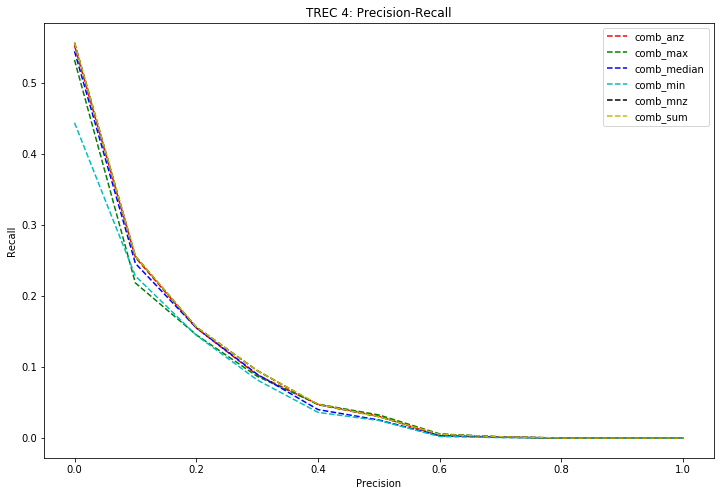

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams["figure.figsize"]=[12,8]
colors=["r","g", "b", "c", "k", "y"]

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('TREC 4: Precision-Recall')
#y = y.values
for i in range(len(combList)):
    print y[combList[i]]
    plt.plot(x,y[combList[i]][0],colors[i]+"--")
plt.legend( [s.replace(".txt","") for s in combList])
plt.show()

### We plot second Curve RP with all condorcet algorithms

In [71]:
condList="condorcet.txt","condorcetLog.txt",'condorcetWeighted.txt','condorcetML.txt'
keys=www.keys()
x=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]#[]+keys
print condList
y={}
for cl in condList:
    y[cl]=list()

#for i in range(1,len(keys)+1):
for cl in condList:
    y[cl].append(pr[cl])

('condorcet.txt', 'condorcetLog.txt', 'condorcetWeighted.txt', 'condorcetML.txt')


[[0.5443, 0.2585, 0.1552, 0.0928, 0.0418, 0.0262, 0.0054, 0.0014, 0.0, 0.0, 0.0]]
[[0.5341, 0.2581, 0.1557, 0.0924, 0.0416, 0.0266, 0.005, 0.0017, 0.0, 0.0, 0.0]]
[[0.5341, 0.2579, 0.1573, 0.0925, 0.0422, 0.0265, 0.0047, 0.0017, 0.0, 0.0, 0.0]]
[[0.5337, 0.2578, 0.1544, 0.0921, 0.0389, 0.0187, 0.005, 0.0017, 0.0, 0.0, 0.0]]


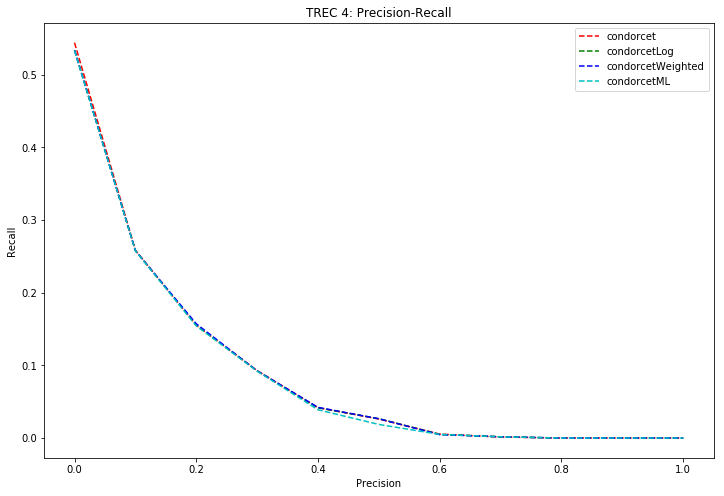

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams["figure.figsize"]=[12,8]
colors=["r","g", "b", "c", "k", "y"]

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('TREC 4: Precision-Recall')
#y = y.values
for i in range(len(condList)):
    print y[condList[i]]
    plt.plot(x,y[condList[i]][0],colors[i]+"--")
plt.legend( [s.replace(".txt","") for s in condList])
plt.show()

### We plot third Curve RP with some comb and condorcet algorithms

In [73]:
condList="condorcet.txt",'condorcetWeighted.txt', 'comb_mnz.txt', 'comb_median.txt'
keys=www.keys()
x=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]#[]+keys
print condList
y={}
for cl in condList:
    y[cl]=list()

#for i in range(1,len(keys)+1):
for cl in condList:
    y[cl].append(pr[cl])

('condorcet.txt', 'condorcetWeighted.txt', 'comb_mnz.txt', 'comb_median.txt')


[[0.5443, 0.2585, 0.1552, 0.0928, 0.0418, 0.0262, 0.0054, 0.0014, 0.0, 0.0, 0.0]]
[[0.5341, 0.2579, 0.1573, 0.0925, 0.0422, 0.0265, 0.0047, 0.0017, 0.0, 0.0, 0.0]]
[[0.556, 0.2557, 0.1561, 0.0949, 0.047, 0.0301, 0.0052, 0.0018, 0.0, 0.0, 0.0]]
[[0.5439, 0.2456, 0.1551, 0.0898, 0.04, 0.0254, 0.0032, 0.0013, 0.0, 0.0, 0.0]]


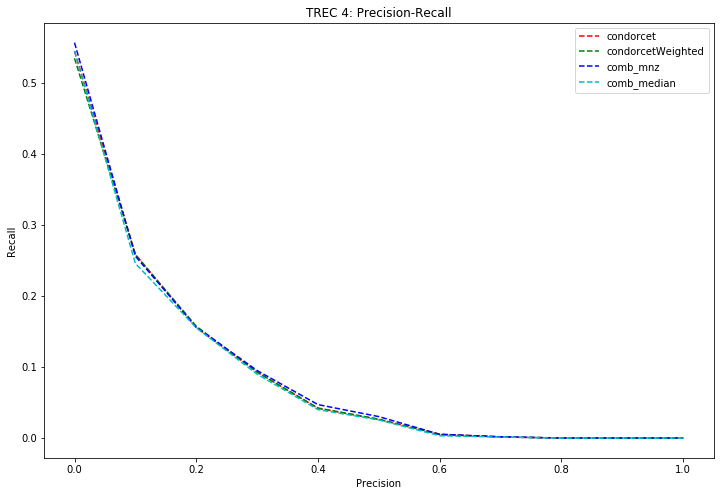

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams["figure.figsize"]=[12,8]
colors=["r","g", "b", "c", "k", "y"]

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('TREC 4: Precision-Recall')
#y = y.values
for i in range(len(condList)):
    print y[condList[i]]
    plt.plot(x,y[condList[i]][0],colors[i]+"--")
plt.legend( [s.replace(".txt","") for s in condList])
plt.show()